# SciPy

SciPy – библиотека Python с открытым исходным кодом, предназначенная для решения научных и математических проблем.  
Документация: [SciPy User Guide](https://docs.scipy.org/doc/scipy/tutorial/index.html)

Основной структурой данных в SciPy является многомерный массив, реализуемый NumPy.

In [1]:
import numpy as np

SciPy состоит из модулей (подпакетов), охватывающих различные области научных вычислений:
* cluster - алгоритмы кластеризации.
* constants - физические и математические константы.
* fftpack - процедуры быстрого преобразования Фурье.
* integrate - интегрирование и решение обыкновенных дифференциальных уравнений.
* interpolate - интерполяция и сглаживающие сплайны.
* io - ввод и вывод.
* linalg - линейная алгебра.
* ndimage - обработка N-мерных изображений.
* odr - ортогональная дистанционная регрессия.
* optimize - процедуры оптимизации и поиска корней.
* signal - обработка сигналов.
* sparse - разреженные матрицы и связанные процедуры.
* spatial - структуры и алгоритмы пространственных данных.
* special - специальные функции.
* stats - статистические распределения и функции.

Ниже будут рассмотрены некоторые из них.

## Модуль interpolate
---

In [2]:
from scipy import interpolate

Интерполяция – нахождение неизвестных промежуточных значений некоторой функции по имеющемуся дискретному набору ее известных значений. Модуль **interpolate** содержит сплайновые функции и классы, одномерные и многомерные интерполяционные классы:
* Одномерная интерполяция: **interp1d** - интерполяция одномерной функции, и другие.
* Многомерная интерполяция: **interp2d** - интерполяция по двумерной сетке, **griddata** - интерполяция неструктурированных данных, и другие.
* Одномерные сплайны: **UnivariateSpline** - одномерный сглаживающий сплайн, соответствующий заданному набору точек, и другие.
* Двумерные сплайны: **SmoothBivariateSpline** - гладкая аппроксимация двумерных сплайнов, **RectBivariateSpline** - аппроксимация двумерных сплайнов на прямоугольной сетке, и другие.

### Одномерная интерполяция

Одномерная интерполяция – построение кривой, которая бы полностью соответствовала набору двумерных точек данных.

Для примера рассмотрим простую функцию, например, экспоненту – $e^{−x/3}$. Выполним интерполяцию с помощью функции **interp1d**, которой передаются два массива значений - координаты точек на плоскости.

In [3]:
x = np.arange(0, 10, 2)
y = np.exp(-x / 3.0)

f = interpolate.interp1d(x, y)

Используем возвращенную интерполяционную функцию для получения новых значений. 

In [4]:
xnew = np.arange(0, 8, 0.1)
ynew = f(xnew)

Построим график. Синие точки – известные значения функции, красная линия – интерполированные значения.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

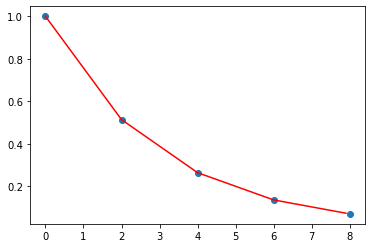

In [6]:
plt.plot(x, y, 'o', xnew, ynew, 'r-')
plt.show()

По умолчанию тип интерполяции (kind) равен linear. Можно задать его вручную, например, quadratic. В этом случае график получится более гладким.

In [7]:
f = interpolate.interp1d(x, y, kind='quadratic')

xnew = np.arange(0, 8, 0.1)
ynew = f(xnew)

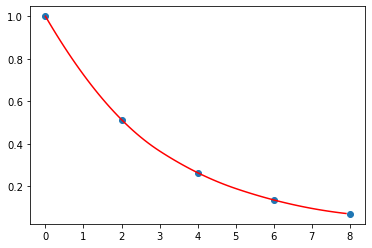

In [8]:
plt.plot(x, y, 'o', xnew, ynew, 'r-')
plt.show()

### Двумерная интерполяция

Многомерная интерполяция (пространственная интерполяция) – это тип интерполяции функции, проходящей через точки в пространстве, а не на плоскости.

Создадим двумерную сетку. Выполним интерполяцию с помощью функции **interp2d**, которой передаем три массива значений (координаты точек в пространстве) и тип интерполяции.

In [9]:
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2 + yy**2)

f = interpolate.interp2d(x, y, z, kind='cubic')

Используем возвращенную интерполяционную функцию для получения новых значений.

In [10]:
xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
znew = f(xnew, ynew)

Построим результат. Синие точки – известные значения, красная линия – интерполированные.

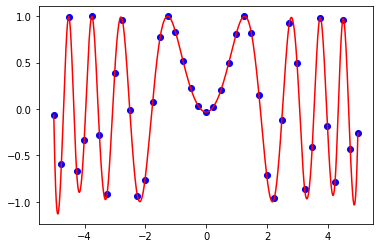

In [11]:
plt.plot(x, z[0, :], 'bo', xnew, znew[0, :], 'r-')
plt.show()

## Модуль linalg
---

In [12]:
from scipy import linalg

Модуль **linalg** содержит функции линейной алгебры:
* Базовые функции для работы с матрицами: **inv** - нахождение обратной матрицы, **solve** - решение системы линейных уравнений, **det** - нахождение определителя матрицы, **norm** - матричная или векторная норма, и другие.
* Нахождение собственных векторов: **eig** - нахождение собственных значений квадратной матрицы, и другие.
* Матричные разложения: **lu** - LU-разложение, **svd** - SVD-разложение, **qr** - QR-разложение, и другие.
* Матричные функции: **expm** - экспонента от матрицы, **logm** - логарифм от матрицы, **cosm** - косинус от матрицы, **sqrtm** - квадратный корень от матрицы, и другие.
* И другие функции.

### Решение системы уравнений

Решим простую систему уравнений:
$$\begin{cases}
  3x + 2y = 2, 
  \\
  x - y = 4,
  \\
  5y + z = -1.
  \end{cases}$$

Первая строчка (**a**) задает матрицу системы, вторая строчка (**b**) – столбец свободных членов. Нужно найти такой вектор **x**, при умножении которого на матрицу **a** в ответе получится **b**.

In [13]:
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

Воспользуемся функцией **solve**, которая принимает два аргумента: матрицу системы и столбец свободных членов. 

In [14]:
x = linalg.solve(a, b)
print(x)

[ 2. -2.  9.]


Для проверки полученного результата, умножим матрицу **a** на полученный **x**. Получившийся вектор совпадет с заданным.

In [15]:
print(np.dot(a, x))

[ 2.  4. -1.]


### Матричное разложение

Рассмотрим сингулярное разложение матрицы, или SVD разложение, которое часто используется в анализе данных. Сингулярное разложение матриц – это представление исходной матрицы произведением трех других: ортогональной, диагональной и снова ортогональной.

Сначала сгенерируем матрицу из случайных чисел размером 4 х 3. Далее с помощью функции **svd** сделаем разложение на 3 матрицы. Получим матрицы следующего вида: ортогональная 4 х 4, диагональная размера 3 и ортогональная 3 х 3 соответственно.

In [16]:
X = np.random.randn(4, 3)
U, D, V = linalg.svd(X)
print(U.shape, D.shape, V.shape)

(4, 4) (3,) (3, 3)


## Модуль optimize
---

In [17]:
from scipy import optimize

Модуль **optimize** содержит несколько наиболее часто используемых оптимизационных алгоритмов:
* Оптимизация скалярных одномерных функций - **minimize_scalar**.
* Неограниченная и ограниченная оптимизация многомерных скалярных функций - **minimize**. Поддерживаются различные методы: Бройдена-Флетчера-Гольдфарба-Шанно (**BFGS**), Нелдера-Мида (**Nelder-Mead**), сопряженных градиентов (**Newton-CG**), и другие.
* Глобальная оптимизация: дифференциальная эволюция - **differential_evolution**, перебор - **brute**, и другие.
* Оптимизация методом наименьших квадратов - **least_squares**.
* И другие функции.

### Глобальная оптимизация

Для примера используем функцию Розенброка, которая часто используется для тестирования оптимизационных алгоритмов. У нее минимум в точке (1, 1). 

In [18]:
def f(x):
    return 0.5 * (1 - x[0])**2 + (x[1] - x[0]**2)**2
    
print(f([1, 1]))

0.0


Для начала применим примитивный метод – перебор (**brute**). Точка минимума находится достаточно точно, но не все функции могут быть вычислены так же быстро. Процесс можно ускорить, использовав другой метод.

In [19]:
result = optimize.brute(f, ((-5, 5), (-5, 5)))
print(result)

[0.99999324 1.00001283]


В случае, если функция плохая (в ней есть разрывы, она не гладкая), подойдет дифференциальная эволюция (**differential_evolution**), это генетический алгоритм. В результате находится точка минимума, но требуется достаточно большое количество итераций (115). 

In [20]:
print(optimize.differential_evolution(f, ((-5, 5), (-5, 5))))

     fun: 7.395570986446986e-32
 message: 'Optimization terminated successfully.'
    nfev: 3483
     nit: 115
 success: True
       x: array([1., 1.])


### Функция minimize

Если у функции есть градиент, можно воспользоваться градиентными методами. Для этого сначала определим градиент функции Розенброка. Функция **check_grad** позволяет проверить правильность определенного градиента. В данном случае расхождение незначительное.

In [21]:
def g(x):
    return np.array((-2 * 0.5 * (1 - x[0]) - 4 * x[0] * (x[1] - x[0]**2), 2 * (x[1] - x[0]**2)))

print(optimize.check_grad(f, g, [2, 2]))

2.384185791015625e-07


Один из популярных градиентных методов – bfgs, он достаточно хорошо решает задачу оптимизации. Воспользуемся функцией **minimize**, передав ей функцию Розенброка и начальное приближение, то есть вектор, с которого начнется некоторый оптимизационный процесс. Также передадим необходимый метод (method) и градиент (jac). Для нахождения точки минимума потребовалось гораздо меньше итераций (8).

In [22]:
print(optimize.minimize(f, [2, 2], method='BFGS', jac=g))

      fun: 1.8414093407262628e-11
 hess_inv: array([[0.95489113, 1.90006768],
       [1.90006768, 4.27872719]])
      jac: array([9.88085521e-07, 2.41739812e-06])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([1.00000582, 1.00001285])


Функции **minimize** не обязательно указывать, какой метод использовать, или передавать градиент. При необходимости она оценит градиент самостоятельно и выберет один из методов по умолчанию (bfgs, slsqp). Результат практически полностью совпадает.

In [23]:
print(optimize.minimize(f, [2, 2]))

      fun: 1.7838045907468558e-11
 hess_inv: array([[0.95489061, 1.90006632],
       [1.90006632, 4.27872378]])
      jac: array([9.88093227e-07, 2.41749084e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([1.00000573, 1.00001265])


## Модуль stats
---

In [24]:
from scipy import stats

Модуль **stats** содержит вероятностные распределения, корреляционные функции и другие статистические функции:
* Вероятностные распределения: непрерывные (**expon**, **gamma**, **norm**), мультивариативные (**dirichlet**), дискретные (**bernoulli**, **binom**, **poisson**).
* Сводная статистика: **describe** - описательная статистика, **mode** - значения моды, **variation** - коэффициент вариации, и другие.
* Частотная статистика: **cumfreq** - кумулятивная частотная гистограмма, и другие.
* Корреляционные функции: **pearsonr** - коэффициент корреляции Пирсона, **sprearmanr** - коэффициент корреляции Спирмана, и другие.
* Статистические тесты: **ttest_ind** - Т-критерий для средних значений двух независимых выборок оценок, **wilcoxon** - критерий знаковых рангов Вилкоксона, **binomtest** - тест на то, что вероятность успеха равна p, и другие.
* И другие функции.

### Вероятностные распределения

Рассмотрим на примере нормального распределения (**norm**). Сгенерируем выборку (**norm.rvs**), построим ее гистограмму и плотность вероятности (**norm.pdf**).

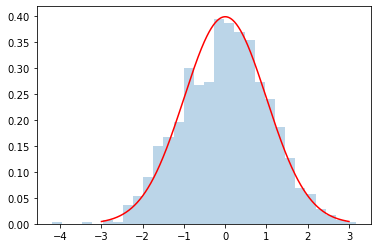

In [25]:
sample = stats.norm.rvs(size=1000)
x = np.linspace(-3, 3, 1000) 

plt.hist(sample, bins=30, density=True, alpha=0.3)
plt.plot(x, stats.norm.pdf(x), color='red')
plt.show()

### Корреляционные функции

Рассмотрим на примере функции **pearsonr**, которая вычисляет коэффициент корреляции Пирсона и значение p для проверки отсутствия корреляции. Коэффициент корреляции Пирсона измеряет линейную связь между двумя наборами данных. Корреляция -1 или +1 подразумевает точную линейную зависимость. Положительные корреляции означают, что с увеличением x увеличивается и y. Отрицательные корреляции означают, что по мере увеличения x y уменьшается. p-значение примерно указывает на вероятность того, что некоррелированная система произведет наборы данных, которые имеют корреляцию Пирсона, по крайней мере, столь же экстремальную, как корреляция, вычисленная на основе этих наборов данных.

Посмотрим, есть ли корреляция между заданным массивом и массивом случайно сгенерированных чисел из диапазона (0, 1). Судя по результату (-0.71), имеется некая обратная линейная зависимость, что можно заметить, посмотрев на элементы сгенерированного массива.

In [26]:
a = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
b = np.random.rand(10)
print(b)

stats.pearsonr(a, b)

[0.88093872 0.23778179 0.40816805 0.69174193 0.58540412 0.08314148
 0.04715318 0.1319308  0.43543605 0.18697981]


(-0.7198925627636783, 0.018893991086011707)

### Статистические тесты

Рассмотрим на примере функции **wilcoxon**, которая вычисляет критерий знаковых рангов Вилкоксона. Он проверяет нулевую гипотезу о том, что две связанные парные выборки происходят из одного и того же распределения. В частности, он проверяет, является ли распределение разностей x - y симметричным относительно нуля.

Рассмотрим следующий пример. Разница в высоте между перекрестными и самоопыляющимися растениями кукурузы представлена следующим образом:

In [27]:
d = [6, 8, 14, 16, 23, 24, 28, 29, 41, -48, 49, 56, 60, -67, 75]

Перекрестно опыленные растения кажутся выше. Чтобы проверить нулевую гипотезу об отсутствии разницы в высоте, можем применить двусторонний тест:

In [28]:
w, p = stats.wilcoxon(d)
w, p

(24.0, 0.041259765625)

Следовательно, при уровне достоверности 5% мы бы отклонили нулевую гипотезу (т.к. p < 0.05), сделав вывод о разнице в росте между группами. Чтобы подтвердить, что медиана различий может считаться положительной, применим тест с указанием альтернативной гипотезы:

In [29]:
w, p = stats.wilcoxon(d, alternative='greater')
w, p

(96.0, 0.0206298828125)

Это показывает, что нулевая гипотеза о том, что медиана отрицательна, может быть отклонена с уровнем достоверности 5% в пользу альтернативы, согласно которой медиана больше нуля.

---
*При создании ноутбука был использован SciPy версии 1.6.2.*